In [ ]:
#sOLUTION 1.1

import numpy as np


def forward_difference(f, x, h):
    result = []
    for hi in h:
        result.append((f(x + hi) - f(x)) / hi)
    return result


def backward_difference(f, x, h):
    result = []
    for hi in h:
        result.append((f(x) - f(x - hi)) / hi)
    return result  

def central_difference(f, x, h):
    result = []
    for hi in h:
        result.append((f(x + hi) - f(x - hi)) / (2 * hi))
    return result

In [ ]:
#SOLUTION 1.2
def f(x):
    return np.exp(x)
x = 0
print("Actual Derivative: ", np.exp(x))

h_values = np.logspace(-10, -1, 100)
actual_derivative = np.exp(x)

error_forward = []
error_backward = []
error_central = []

for h in h_values:
    forward = forward_difference(f, x, [h])[0]
    backward = backward_difference(f, x, [h])[0]
    central = central_difference(f, x, [h])[0]

    error_forward.append((forward - actual_derivative)/ actual_derivative)
    error_backward.append((backward - actual_derivative)/ actual_derivative)
    error_central.append((central - actual_derivative)/ actual_derivative)



Actual Derivative:  1.0


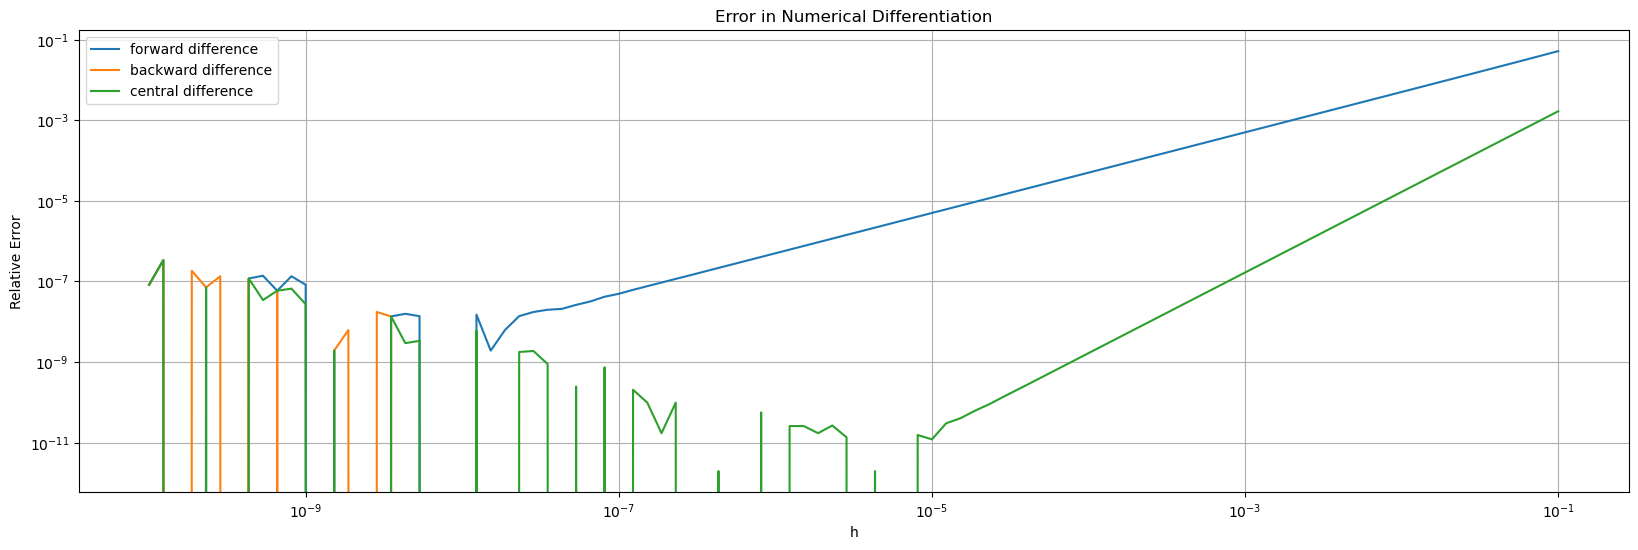

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.loglog(h_values, error_forward, label = 'forward difference')
plt.loglog(h_values, error_backward, label = 'backward difference')
plt.loglog(h_values, error_central, label = 'central difference')

plt.xlabel('h')
plt.ylabel('Relative Error')
plt.title('Error in Numerical Differentiation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#SOLUTION 1.3

#AS WE INCREASE h, ERROR INCREASES DUE TO TRUNCATION ERROR, SMALLER STEP SIZE MEANS MORE ACCURATE RESULT
#FORWARD/BACKWARD DIFFERENCE IS O(h), CENTRAL DIFFERENCE IS O(h^2) 

In [ ]:
#SOLUTION 2.2
import numpy as np

def gradient(func, eval_point, h=1e-3):

    eval_point = np.array(eval_point, dtype=float)
    n = len(eval_point)
    grad = np.zeros(n)

    for i in range(n):
        # Create shifted points 
        forward = np.array(eval_point, copy=True)
        backward = np.array(eval_point, copy=True)
        forward[i] += h
        backward[i] -= h

        # Central difference 
        grad[i] = (func(forward) - func(backward)) / (2 * h)

    return grad


In [ ]:
#SOLUTION 2.3
import numpy as np

def f(v):
    x, y = v
    return np.exp(2*x) + np.exp(y) * np.sin(x*y)


In [7]:
def analytical_grad(v):
    x, y = v
    dfdx = 2*np.exp(2*x) + np.exp(y) * y * np.cos(x*y)
    dfdy = np.exp(y) * np.sin(x*y) + np.exp(y) * x * np.cos(x*y)
    return np.array([dfdx, dfdy])


In [11]:
eval_point = np.array([-1.0, 1.0])
A_grad = analytical_grad(eval_point)

hs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
approx_errors = []

for h in hs:
    g = gradient(f, eval_point, h)
    error = np.linalg.norm(g - A_grad)
    approx_errors.append(error)
    print(f"h={h:.0e}, gradient={g}, error={error:.2e}")

print("\nAnalytical gradient:", A_grad)


h=1e-01, gradient=[ 1.73872599 -3.75330784], error=2.81e-03
h=1e-02, gradient=[ 1.73935807 -3.75602194], error=2.80e-05
h=1e-03, gradient=[ 1.73936444 -3.75604895], error=2.80e-07
h=1e-04, gradient=[ 1.73936451 -3.75604922], error=2.80e-09
h=1e-05, gradient=[ 1.73936451 -3.75604923], error=2.97e-11

Analytical gradient: [ 1.73936451 -3.75604923]


In [ ]:
# Define a small grid 
x = np.linspace(-1.01, -0.99, 3)
y = np.linspace(0.99, 1.01, 3)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = np.exp(2*X) + np.exp(Y) * np.sin(X*Y)

# Compute gradient on the grid
grad_x, grad_y = np.gradient(Z, x, y)

# Take the gradient
np_grad = np.array([grad_x[1,1], grad_y[1,1]])
print("NumPy grid-based gradient:", np_grad)


NumPy grid-based gradient: [ 1.73935807 -3.75602194]
